In [173]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [174]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year

p1_lat, p1_lon = 39.835694, -105.359097
p2_lat, p2_lon = 39.855119, -105.297783
p3_lat, p3_lon = 39.655210, -105.402332
p4_lat, p4_lon = 39.965930, -105.440591

# You must request an NSRDB api key from the link above
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'
   
# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [175]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,148698,-,-,-,39.97,-105.46,-7,2529,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


In [176]:
# Return all but first 2 lines of csv to get data:
df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p1_lat, lon=p1_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)

# Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
# df.set_index()
# take a look
print('shape:', df.shape)
df.head(8)
# print(df.iloc[2,:])

shape: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-9,145.08,-15,53.54,0.866,750,0.516,3.8,270.0,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-9,139.51,-14,57.22,0.866,750,0.523,3.8,270.0,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-9,133.81,-14,57.23,0.866,750,0.527,3.7,270.0,0,0,0


In [177]:
# df.insert(3, 'MonthDay', df['Month']*100+df['Day']*10+df['Minute'])
dff = df.drop(columns=['Year'], axis=1)

dff.head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0


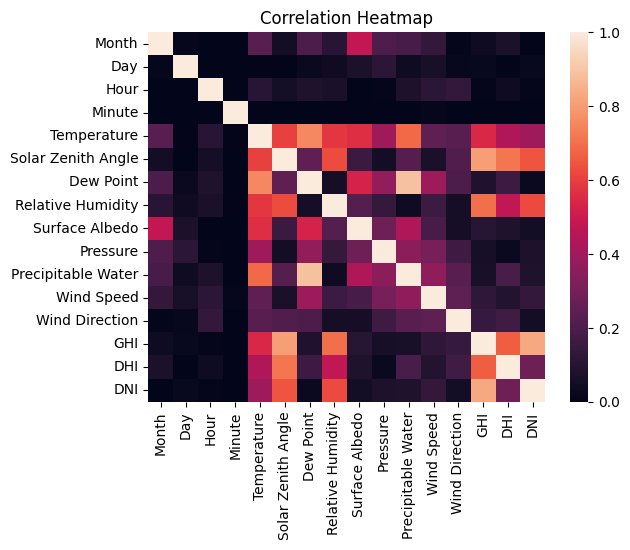

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = abs(dff.corr())
heatmap = sns.heatmap(abs(corr_matrix))
plt.title('Correlation Heatmap')
plt.show()

In [179]:
df['DNI after 0.5h'] = df[['DNI']].shift(1)
df['DNI after 1.0h'] = df[['DNI']].shift(2)
df['DNI after 1.5h'] = df[['DNI']].shift(3)
df['DNI after 2.0h'] = df[['DNI']].shift(4)
df['DNI after 2.5h'] = df[['DNI']].shift(5)
df['DNI after 3.0h'] = df[['DNI']].shift(6)
df['DNI after 3.5h'] = df[['DNI']].shift(7)
df['DNI after 4.0h'] = df[['DNI']].shift(8)
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,...,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,2010,1,1,0,0,-10,163.12,-16,59.53,0.866,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,2010,1,1,0,30,-10,162.32,-16,55.02,0.866,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,0,-10,159.50,-16,55.62,0.866,...,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,2010,1,1,1,30,-9,155.34,-16,55.63,0.866,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,0,-9,150.42,-15,57.88,0.866,...,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [180]:
sub_df = df.iloc[:, 5:]
sub_df.head()

,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


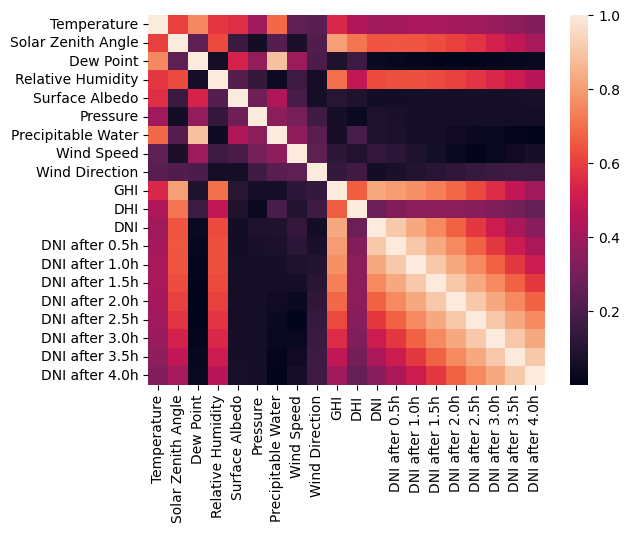

In [181]:
corr_matrix = abs(sub_df.corr()) 
dataplot = sns.heatmap(corr_matrix)
# displaying heatmap
plt.show()

In [182]:
sub_df.drop(['Dew Point', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Wind Direction'], axis=1, inplace=True)
sub_df.head()

,Temperature,Solar Zenith Angle,Relative Humidity,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-10,163.12,59.53,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-10,162.32,55.02,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-10,159.50,55.62,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-9,155.34,55.63,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-9,150.42,57.88,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


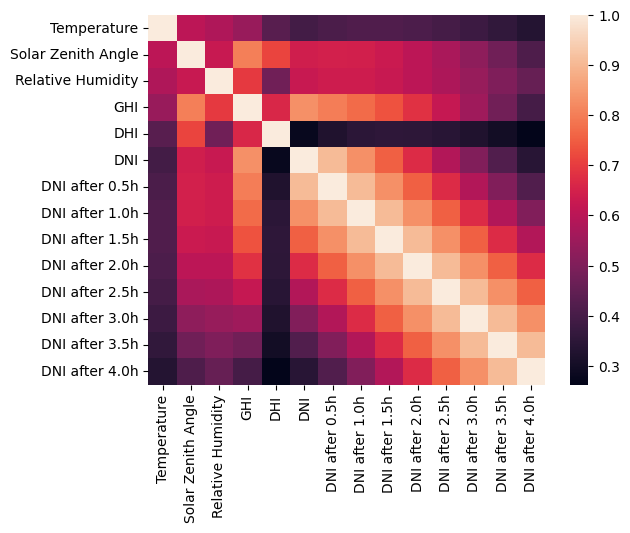

In [183]:
corr_matrix = abs(sub_df.corr()) 
dataplot = sns.heatmap(corr_matrix)
# displaying heatmap
plt.show()

In [188]:
win_size = 8
df_fetures = sub_df.iloc[:,:-8]

X = np.zeros((df_fetures.shape[0] - win_size, win_size * df_fetures.shape[1]))
Y = np.zeros((df_fetures.shape[0] - win_size, 1))

print("Feature array size:{}, Labels array size{}".format(X.shape, Y.shape))

for i in range(X.shape[0]):
    chunk_x = df_fetures.iloc[i:i+win_size, :].to_numpy()
    chunk_y = df_fetures.iloc[i+win_size, -1]
    X[i] = np.reshape(chunk_x, (1, df_fetures.shape[1] * win_size))
    Y[i]= chunk_y
    # if i == 5:
    #     print("X = ", X[0])
    #     print("Y = ", Y[0])

Feature array size:(17512, 48), Labels array size(17512, 1)


In [189]:
####################### This cell is for prediction not forcasting ############################
# X = dff.iloc[:, :-1]
# Y = dff.iloc[:, -1]
# print("Features array size: ", X.shape)
# print("Labels array size: ", Y.shape)

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 1 - train_ratio)

# Genearate ValX, TestX, ValY and TestY
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

sc=StandardScaler()
scaler = sc.fit(trainX)

trainX_scaled = scaler.transform(trainX)
valX_scaled = scaler.transform(valX)
testX_scaled = scaler.transform(testX)

print(trainX_scaled.shape)
print(valX_scaled.shape)
print(testX_scaled.shape)


(12258, 48)
(2627, 48)
(2627, 48)


In [218]:
# let's try linear regression first
from sklearn import linear_model, metrics


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(trainX_scaled, trainY)

# Make predictions using the testing set
y_pred_linreg = regr.predict(testX_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred_linreg))


Mean Absolute Error: 79.63432405605226
Mean Squared Error: 18920.642001403397
Root Mean Squared Error: 137.55232459469158
Mean Absolute Percentage Error: 9.009076414469739e+16


In [222]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(trainX_scaled,trainY)
y_pred_svr = regressor.predict(testX_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred_svr))


/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 124.78035968548973
Mean Squared Error: 40285.17661750173
Root Mean Squared Error: 200.71167533928298
Mean Absolute Percentage Error: 6.080882735577462e+16


In [191]:
input_shape = trainX.shape[1]
n_batch_size = 128

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)
n_epochs = 120


print('Input Shape:{} '.format(input_shape))
print('Batch Size:{}'.format(n_batch_size))
print('Steps per Epoch:{}'.format(n_steps_per_epoch))
print('Validation Steps:{}'.format(n_validation_steps))
print('Test Steps:{}'.format(n_test_steps))
print('Number of Epochs:{}'.format(n_epochs))


Input Shape:48 
Batch Size:128
Steps per Epoch:95
Validation Steps:20
Test Steps:20
Number of Epochs:120


In [193]:
import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 64)                3136      
                                                                 
 dense_103 (Dense)           (None, 64)                4160      
                                                                 
 dense_104 (Dense)           (None, 1)                 65        
                                                                 
Total params: 7361 (28.75 KB)
Trainable params: 7361 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [194]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# Prepare a directory to store all the checkpoints.
checkpoint_no = 'ckpt_1_ANN'
model_name = 'dnl_forcast_ANN'
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, monitor='val_loss', save_best_only=True, mode='auto')]

history = model.fit(trainX_scaled,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Epoch 1/120
 1/95 [..............................] - ETA: 18s - loss: 123193.3281 - mae: 169.5404INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 3ms/step - loss: 154709.4062 - mae: 227.3428 - val_loss: 122860.5156 - val_mae: 214.7874
Epoch 2/120
 1/95 [..............................] - ETA: 0s - loss: 106559.7422 - mae: 198.5663INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 82210.0938 - mae: 182.3765 - val_loss: 63810.7109 - val_mae: 168.6549
Epoch 3/120
 1/95 [..............................] - ETA: 0s - loss: 66533.5234 - mae: 167.5466INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 42251.0547 - mae: 135.9754 - val_loss: 33413.0859 - val_mae: 121.8639
Epoch 4/120
 1/95 [..............................] - ETA: 0s - loss: 36161.3125 - mae: 131.0654INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 29448.4648 - mae: 111.1103 - val_loss: 27634.7305 - val_mae: 108.9746
Epoch 5/120
 1/95 [..............................] - ETA: 0s - loss: 31740.4922 - mae: 119.6285INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 25693.3848 - mae: 102.6306 - val_loss: 25046.1660 - val_mae: 101.9452
Epoch 6/120
 1/95 [..............................] - ETA: 0s - loss: 35974.9844 - mae: 116.4941INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 23700.3418 - mae: 96.0028 - val_loss: 23425.0664 - val_mae: 95.1648
Epoch 7/120
 1/95 [..............................] - ETA: 0s - loss: 22792.4648 - mae: 103.8036INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 22149.6328 - mae: 91.1074 - val_loss: 22243.6582 - val_mae: 89.3881
Epoch 8/120
50/95 [==============>...............] - ETA: 0s - loss: 21575.5781 - mae: 87.6866 INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 21333.5293 - mae: 86.8864 - val_loss: 21451.5039 - val_mae: 86.6864
Epoch 9/120
 1/95 [..............................] - ETA: 0s - loss: 13563.4551 - mae: 73.2571INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 20749.0332 - mae: 84.6799 - val_loss: 20896.7812 - val_mae: 83.0479
Epoch 10/120
 1/95 [..............................] - ETA: 0s - loss: 24381.2715 - mae: 96.9925INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 20265.9238 - mae: 82.1645 - val_loss: 20705.1992 - val_mae: 81.3837
Epoch 11/120
 1/95 [..............................] - ETA: 0s - loss: 17011.0469 - mae: 68.5241INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 19813.4883 - mae: 79.8237 - val_loss: 20157.5215 - val_mae: 79.9839
Epoch 12/120
 1/95 [..............................] - ETA: 0s - loss: 10396.6025 - mae: 62.0920INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 19328.5098 - mae: 77.4923 - val_loss: 19861.3145 - val_mae: 77.5558
Epoch 13/120
 1/95 [..............................] - ETA: 0s - loss: 15110.9580 - mae: 70.0873INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 19615.2988 - mae: 78.0078 - val_loss: 19677.1621 - val_mae: 76.9648
Epoch 14/120
 1/95 [..............................] - ETA: 0s - loss: 21836.0352 - mae: 83.8523INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 18313.5703 - mae: 74.4296 - val_loss: 19606.6289 - val_mae: 79.1850
Epoch 15/120
 1/95 [..............................] - ETA: 0s - loss: 15920.3057 - mae: 73.7381INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 5ms/step - loss: 18958.3184 - mae: 75.5313 - val_loss: 19309.1289 - val_mae: 76.4230
Epoch 16/120
95/95 [==============================] - 0s 640us/step - loss: 18951.5156 - mae: 74.9874 - val_loss: 19522.9883 - val_mae: 79.5511
Epoch 17/120
 1/95 [..............................] - ETA: 0s - loss: 22587.8770 - mae: 76.3176INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 18366.3027 - mae: 73.8316 - val_loss: 19109.7480 - val_mae: 75.2675
Epoch 18/120
 1/95 [..............................] - ETA: 0s - loss: 16774.3184 - mae: 70.4886INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 18384.6641 - mae: 73.5719 - val_loss: 19047.3555 - val_mae: 73.5548
Epoch 19/120
95/95 [==============================] - 0s 929us/step - loss: 18462.7051 - mae: 72.8913 - val_loss: 19111.8086 - val_mae: 72.6958
Epoch 20/120
 1/95 [..............................] - ETA: 0s - loss: 15283.6904 - mae: 69.8952INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 18055.6504 - mae: 72.4431 - val_loss: 18974.3242 - val_mae: 75.6274
Epoch 21/120
 1/95 [..............................] - ETA: 0s - loss: 13494.6543 - mae: 66.5029INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 18366.7598 - mae: 72.8493 - val_loss: 18903.1602 - val_mae: 72.9237
Epoch 22/120
 1/95 [..............................] - ETA: 0s - loss: 23475.4180 - mae: 72.8584INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 18392.1484 - mae: 71.9463 - val_loss: 18808.1426 - val_mae: 72.6950
Epoch 23/120
 1/95 [..............................] - ETA: 0s - loss: 18750.1113 - mae: 75.7505INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 17804.3340 - mae: 71.5731 - val_loss: 18786.9980 - val_mae: 72.0091
Epoch 24/120
 1/95 [..............................] - ETA: 0s - loss: 26311.1133 - mae: 82.8773INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 18179.8379 - mae: 70.9778 - val_loss: 18717.5801 - val_mae: 72.7282
Epoch 25/120
95/95 [==============================] - 0s 662us/step - loss: 18432.7695 - mae: 72.7284 - val_loss: 18728.1055 - val_mae: 73.7744
Epoch 26/120
95/95 [==============================] - 0s 653us/step - loss: 17512.5469 - mae: 70.8336 - val_loss: 19029.3223 - val_mae: 70.5159
Epoch 27/120
95/95 [==============================] - 0s 664us/step - loss: 17814.9668 - mae: 70.7974 - val_loss: 18756.4043 - val_mae: 74.0913
Epoch 28/120
95/95 [==============================] - 0s 675us/step - loss: 17589.8848 - mae: 70.4573 - val_loss: 18843.3027 - val_mae: 74.7280
Epoch 29/120
 1/95 [..............................] - ETA: 0s - loss: 32480.0391 - mae: 95.2136INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 18483.6270 - mae: 72.2661 - val_loss: 18699.7500 - val_mae: 73.4010
Epoch 30/120
95/95 [==============================] - 0s 682us/step - loss: 17410.2852 - mae: 69.8899 - val_loss: 18792.0488 - val_mae: 70.9994
Epoch 31/120
 1/95 [..............................] - ETA: 0s - loss: 17918.1875 - mae: 73.6963INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 17966.0312 - mae: 71.9282 - val_loss: 18574.1758 - val_mae: 72.4325
Epoch 32/120
95/95 [==============================] - 0s 689us/step - loss: 17452.2383 - mae: 69.6882 - val_loss: 18624.6035 - val_mae: 70.7723
Epoch 33/120
95/95 [==============================] - 0s 673us/step - loss: 17618.1113 - mae: 70.5145 - val_loss: 18693.5430 - val_mae: 70.6904
Epoch 34/120
95/95 [==============================] - 0s 669us/step - loss: 17926.7969 - mae: 70.9782 - val_loss: 18623.4883 - val_mae: 72.6921
Epoch 35/120
95/95 [==============================] - 0s 660us/step - loss: 17933.6406 - mae: 71.3209 - val_loss: 18690.5488 - val_mae: 73.2132
Epoch 36/120
95/95 [==============================] - 0s 664us/step - loss: 17134.4062 - mae: 69.2758 - val_loss: 18674.6484 - val_mae: 73.4167
Epoch 37/120
95/95 [==============================] - 0s 661us/step - loss: 17792.8730 - mae: 71.3012 - val_loss: 18656.6719 - val_mae: 70.9413
Epoch 3

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 17360.6309 - mae: 70.1209 - val_loss: 18502.9883 - val_mae: 73.0512
Epoch 40/120
95/95 [==============================] - 0s 671us/step - loss: 17208.5430 - mae: 69.1886 - val_loss: 18588.0137 - val_mae: 73.3728
Epoch 41/120
 1/95 [..............................] - ETA: 0s - loss: 11212.8848 - mae: 59.2040INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 17780.3535 - mae: 70.8856 - val_loss: 18472.3125 - val_mae: 70.8875
Epoch 42/120
95/95 [==============================] - 0s 666us/step - loss: 17385.3965 - mae: 70.2905 - val_loss: 18725.1211 - val_mae: 75.1221
Epoch 43/120
95/95 [==============================] - 0s 650us/step - loss: 16893.8242 - mae: 68.3453 - val_loss: 18485.8711 - val_mae: 71.6078
Epoch 44/120
95/95 [==============================] - 0s 649us/step - loss: 17179.9414 - mae: 69.7784 - val_loss: 18802.0586 - val_mae: 74.9031
Epoch 45/120
 1/95 [..............................] - ETA: 0s - loss: 17776.1758 - mae: 68.1594INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 17349.2676 - mae: 70.1122 - val_loss: 18447.5977 - val_mae: 71.3957
Epoch 46/120
95/95 [==============================] - 0s 659us/step - loss: 17093.6699 - mae: 69.2324 - val_loss: 18480.0684 - val_mae: 70.9358
Epoch 47/120
 1/95 [..............................] - ETA: 0s - loss: 17464.2227 - mae: 69.7572INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 17363.0957 - mae: 70.1193 - val_loss: 18374.2090 - val_mae: 71.4245
Epoch 48/120
95/95 [==============================] - 0s 998us/step - loss: 16777.3340 - mae: 68.4621 - val_loss: 18487.2031 - val_mae: 71.7233
Epoch 49/120
 1/95 [..............................] - ETA: 0s - loss: 17545.2559 - mae: 73.6367INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 17221.2715 - mae: 70.0135 - val_loss: 18280.3398 - val_mae: 70.9846
Epoch 50/120
95/95 [==============================] - 0s 683us/step - loss: 17141.3047 - mae: 69.4999 - val_loss: 18334.3066 - val_mae: 70.6055
Epoch 51/120
95/95 [==============================] - 0s 654us/step - loss: 16502.1543 - mae: 68.2422 - val_loss: 18395.4043 - val_mae: 71.1379
Epoch 52/120
95/95 [==============================] - 0s 665us/step - loss: 17853.7715 - mae: 71.1960 - val_loss: 18500.9023 - val_mae: 75.9330
Epoch 53/120
95/95 [==============================] - 0s 675us/step - loss: 16315.4971 - mae: 67.9010 - val_loss: 18289.7383 - val_mae: 71.6711
Epoch 54/120
95/95 [==============================] - 0s 656us/step - loss: 16880.9414 - mae: 68.9675 - val_loss: 18689.6621 - val_mae: 74.2480
Epoch 55/120
95/95 [==============================] - 0s 636us/step - loss: 17241.8711 - mae: 69.7262 - val_loss: 18406.2422 - val_mae: 70.5702
Epoch 5

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 16933.8887 - mae: 69.1933 - val_loss: 18272.8105 - val_mae: 71.1083
Epoch 57/120
 1/95 [..............................] - ETA: 0s - loss: 9735.0703 - mae: 52.6275INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 16938.1211 - mae: 68.7096 - val_loss: 18257.4316 - val_mae: 70.0112
Epoch 58/120
 1/95 [..............................] - ETA: 0s - loss: 13744.2910 - mae: 60.4792INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 16627.6270 - mae: 68.4873 - val_loss: 18196.7715 - val_mae: 71.5105
Epoch 59/120
95/95 [==============================] - 0s 690us/step - loss: 16819.0039 - mae: 69.2001 - val_loss: 18325.0215 - val_mae: 69.8184
Epoch 60/120
95/95 [==============================] - 0s 668us/step - loss: 16652.9746 - mae: 68.4635 - val_loss: 18724.9219 - val_mae: 74.5028
Epoch 61/120
 1/95 [..............................] - ETA: 0s - loss: 19560.6387 - mae: 78.4008INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 16731.3789 - mae: 68.7117 - val_loss: 18085.0918 - val_mae: 71.3643
Epoch 62/120
95/95 [==============================] - 0s 688us/step - loss: 16796.7246 - mae: 68.9415 - val_loss: 18395.2812 - val_mae: 73.4806
Epoch 63/120
95/95 [==============================] - 0s 671us/step - loss: 16843.1016 - mae: 68.7050 - val_loss: 18116.1934 - val_mae: 71.7994
Epoch 64/120
95/95 [==============================] - 0s 660us/step - loss: 16503.6328 - mae: 68.3926 - val_loss: 18234.7656 - val_mae: 70.4584
Epoch 65/120
95/95 [==============================] - 0s 661us/step - loss: 16791.0996 - mae: 69.0909 - val_loss: 18361.2871 - val_mae: 76.0362
Epoch 66/120
95/95 [==============================] - 0s 668us/step - loss: 16493.8398 - mae: 67.8258 - val_loss: 18121.7949 - val_mae: 71.3152
Epoch 67/120
95/95 [==============================] - 0s 672us/step - loss: 17290.6641 - mae: 70.0568 - val_loss: 18208.4297 - val_mae: 71.6534
Epoch 6

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 16755.4023 - mae: 69.0883 - val_loss: 17969.3320 - val_mae: 71.1230
Epoch 70/120
95/95 [==============================] - 0s 687us/step - loss: 16407.7109 - mae: 67.7927 - val_loss: 18417.0020 - val_mae: 72.0927
Epoch 71/120
95/95 [==============================] - 0s 681us/step - loss: 16908.2266 - mae: 68.9543 - val_loss: 18076.5742 - val_mae: 70.5732
Epoch 72/120
95/95 [==============================] - 0s 678us/step - loss: 16222.0977 - mae: 68.0844 - val_loss: 18148.1465 - val_mae: 70.4575
Epoch 73/120
95/95 [==============================] - 0s 679us/step - loss: 16654.7871 - mae: 68.2984 - val_loss: 18041.9160 - val_mae: 71.5996
Epoch 74/120
95/95 [==============================] - 0s 677us/step - loss: 16347.9268 - mae: 67.6679 - val_loss: 18179.1094 - val_mae: 70.0029
Epoch 75/120
95/95 [==============================] - 0s 642us/step - loss: 16580.0078 - mae: 68.6580 - val_loss: 18107.0215 - val_mae: 73.9394
Epoch 7

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 16595.6914 - mae: 68.1261 - val_loss: 17963.7461 - val_mae: 70.0371
Epoch 87/120
95/95 [==============================] - 0s 748us/step - loss: 16389.3008 - mae: 68.0883 - val_loss: 18483.3867 - val_mae: 77.3866
Epoch 88/120
95/95 [==============================] - 0s 643us/step - loss: 16148.2344 - mae: 67.5088 - val_loss: 18005.1113 - val_mae: 71.8790
Epoch 89/120
95/95 [==============================] - 0s 899us/step - loss: 16131.9902 - mae: 66.9800 - val_loss: 18137.9414 - val_mae: 70.8445
Epoch 90/120
95/95 [==============================] - 0s 647us/step - loss: 16191.7441 - mae: 67.5532 - val_loss: 18127.5586 - val_mae: 72.0367
Epoch 91/120
95/95 [==============================] - 0s 657us/step - loss: 16577.1777 - mae: 68.2213 - val_loss: 18005.9492 - val_mae: 71.0562
Epoch 92/120
 1/95 [..............................] - ETA: 0s - loss: 17973.3945 - mae: 76.6553INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forc

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 16110.4990 - mae: 67.5057 - val_loss: 17932.2520 - val_mae: 71.7511
Epoch 93/120
95/95 [==============================] - 0s 679us/step - loss: 16098.7939 - mae: 67.4232 - val_loss: 18018.5332 - val_mae: 71.2439
Epoch 94/120
95/95 [==============================] - 0s 649us/step - loss: 16248.2285 - mae: 67.4218 - val_loss: 18103.4473 - val_mae: 71.7840
Epoch 95/120
95/95 [==============================] - 0s 634us/step - loss: 16306.0654 - mae: 67.8934 - val_loss: 18173.1660 - val_mae: 72.3471
Epoch 96/120
95/95 [==============================] - 0s 639us/step - loss: 16101.6123 - mae: 67.0052 - val_loss: 18221.6445 - val_mae: 69.9674
Epoch 97/120
95/95 [==============================] - 0s 634us/step - loss: 16154.6484 - mae: 67.3937 - val_loss: 17984.8398 - val_mae: 70.9529
Epoch 98/120
95/95 [==============================] - 0s 635us/step - loss: 16160.0420 - mae: 67.4085 - val_loss: 17962.7012 - val_mae: 69.8255
Epoch 9

In [195]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,mae,val_loss,val_mae
0,1,154709.406250,227.342819,122860.515625,214.787445
1,2,82210.093750,182.376465,63810.710938,168.654877
2,3,42251.054688,135.975357,33413.085938,121.863853
3,4,29448.464844,111.110336,27634.730469,108.974609
4,5,25693.384766,102.630615,25046.166016,101.945190


In [196]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,mae,val_loss,val_mae
91,92,16110.499023,67.505707,17932.251953,71.751091


In [197]:
pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))

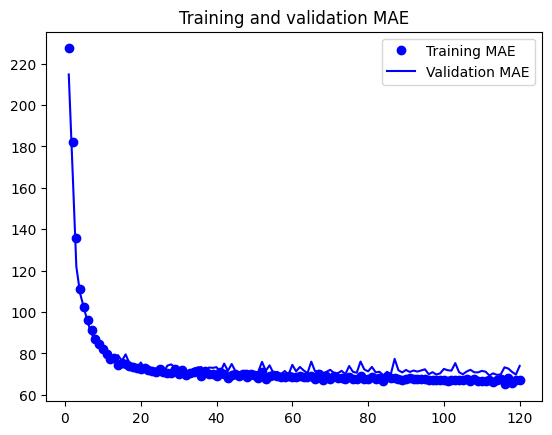

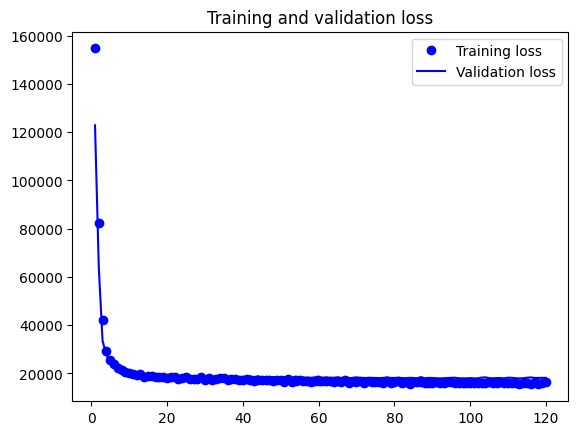

In [198]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [199]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [200]:
k = 5
num_val_samples = len(trainX) // k
all_scores = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    print('MAE: ' + str(val_mae))
    print('========================')


Processing Fold 0
MAE: 71.35858154296875
Processing Fold 1
MAE: 67.29618072509766
Processing Fold 2
MAE: 71.0232162475586
Processing Fold 3
MAE: 68.46066284179688
Processing Fold 4
MAE: 64.0823745727539


In [201]:
for i, val in enumerate(all_scores):
    print('Fold ' + str(i) +': ' + 'MAE of', val)

print('Mean MAE of all folds: ' + str(np.mean(all_scores)))

Fold 0: MAE of 71.35858154296875
Fold 1: MAE of 67.29618072509766
Fold 2: MAE of 71.0232162475586
Fold 3: MAE of 68.46066284179688
Fold 4: MAE of 64.0823745727539
Mean MAE of all folds: 68.44420318603515


In [202]:
all_mae_histories = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [203]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(n_epochs)]

len(average_mae_history)

120

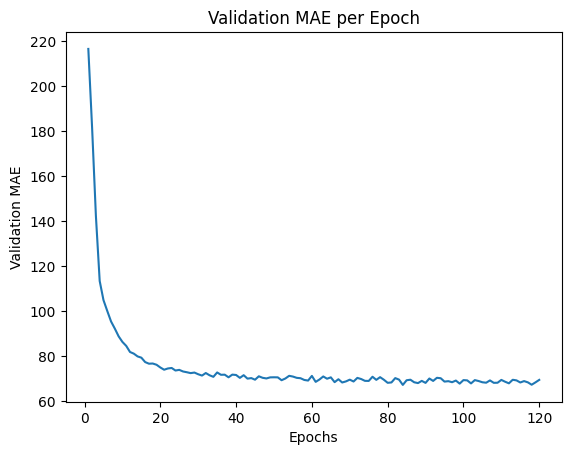

In [204]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [205]:
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)
best_model = load_model(model_name_temp)

/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [206]:
test_loss, test_mae = best_model.evaluate(testX_scaled, testY, steps=n_test_steps)
print()
print('Test MAE:', test_mae)

20/20 [==============================] - 0s 441us/step - loss: 17059.7070 - mae: 69.4256

Test MAE: 69.42559051513672


In [207]:
y_pred = model.predict(testX_scaled)
y_pred[:5]

83/83 [==============================] - 0s 324us/step


array([[ 3.5274594e+02],
       [-2.2005206e-01],
       [ 1.2228978e+02],
       [ 8.5911914e+02],
       [-1.3809292e+00]], dtype=float32)

In [208]:
df_testY = pd.DataFrame(testY)
df_y_pred = pd.DataFrame(y_pred)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

,Actual,Predicted
0,32.0,352.745941
1,0.0,-0.220052
2,361.0,122.289780
3,859.0,859.119141
4,0.0,-1.380929
...,...,...
2622,999.0,973.508911
2623,889.0,841.459473
2624,946.0,878.875671
2625,0.0,-7.424745


In [224]:
print("Neural Network")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred))
print("=================================================================\n")
print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred_linreg))
print("=================================================================\n")
print("SVR")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred_svr))


Neural Network
Mean Absolute Error: 69.07765476105556
Mean Squared Error: 17442.218143082595
Root Mean Squared Error: 132.06899008882667
Mean Absolute Percentage Error: 5.801590813751698e+16

Linear Regression
Mean Absolute Error: 79.63432405605226
Mean Squared Error: 18920.642001403397
Root Mean Squared Error: 137.55232459469158
Mean Absolute Percentage Error: 9.009076414469739e+16

SVR
Mean Absolute Error: 124.78035968548973
Mean Squared Error: 40285.17661750173
Root Mean Squared Error: 200.71167533928298
Mean Absolute Percentage Error: 6.080882735577462e+16


In [216]:
print(df.shape[0])
testY.shape[0]

17520


2627